<a href="https://colab.research.google.com/github/aksingh21/Probabilistic-Programming-PyMC3/blob/master/Stochastic_volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Stochastic volatility
#Case Study 1 - https://docs.pymc.io/notebooks/getting_started.html

import pandas as pd
import pymc3 as pm


import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [6]:
returns = pd.read_csv(pm.get_data('SP500.csv'), parse_dates=True, index_col=0)
len(returns)

401

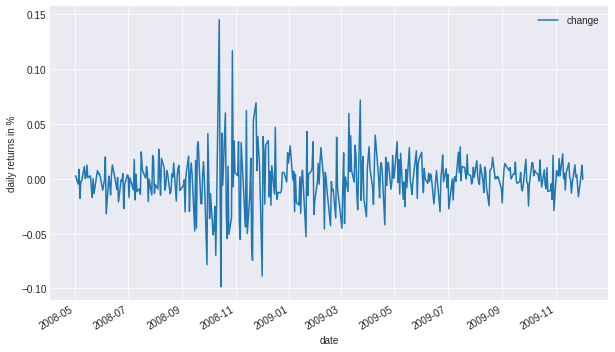

In [10]:
returns.plot(figsize=(10, 6))
plt.ylabel('daily returns in %');

In [0]:
with pm.Model() as sp500_model:
    nu = pm.Exponential('nu', 1/10., testval=5.)
    sigma = pm.Exponential('sigma', 1/0.02, testval=.1)

    s = pm.GaussianRandomWalk('s', sd=sigma, shape=len(returns))
    volatility_process = pm.Deterministic('volatility_process', pm.math.exp(-2*s)**0.5)

    r = pm.StudentT('r', nu=nu, sd=volatility_process, observed=returns['change'])

In [13]:
with sp500_model:
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [s, sigma, nu]
100%|██████████| 2500/2500 [02:27<00:00, 16.98it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


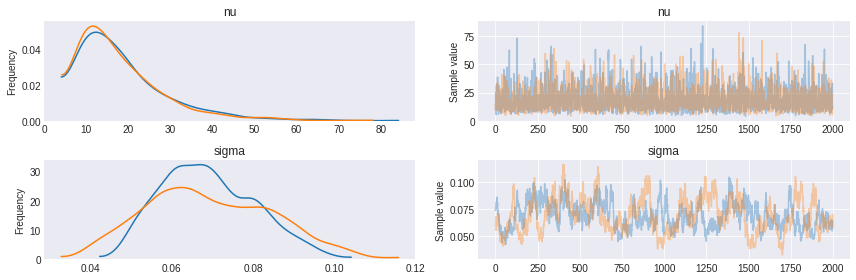

In [15]:
pm.traceplot(trace, varnames=['nu', 'sigma']);

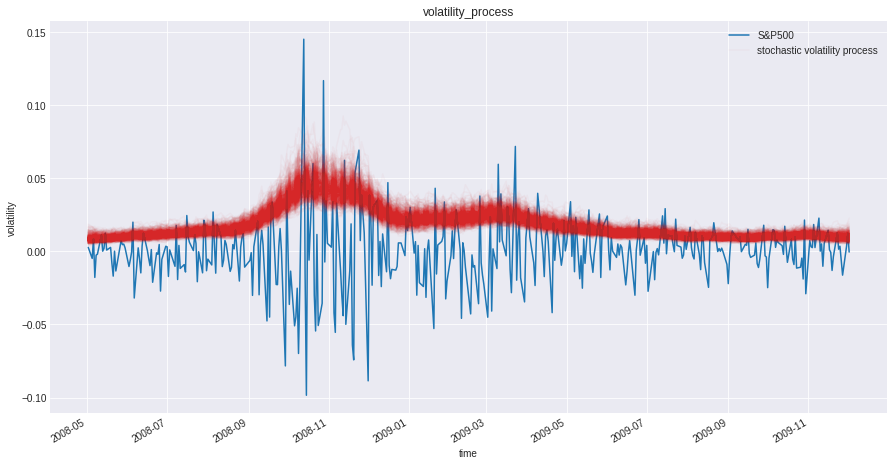

In [16]:
fig, ax = plt.subplots(figsize=(15, 8))
returns.plot(ax=ax)
ax.plot(returns.index, 1/np.exp(trace['s',::5].T), 'C3', alpha=.03);
ax.set(title='volatility_process', xlabel='time', ylabel='volatility');
ax.legend(['S&P500', 'stochastic volatility process']);